In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# load the data
from google.colab import files
uploaded = files.upload()

Saving BTC-USD-5Y.csv to BTC-USD-5Y.csv


In [ ]:
# Store the data in a dataframe
df = pd.read_csv('BTC-USD-5Y.csv')

# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-14,608.841003,611.952026,608.409973,610.684021,610.684021,4.787770e+07
1,2016-09-15,610.588013,611.085999,607.155029,607.155029,607.155029,5.946460e+07
2,2016-09-16,607.245972,609.260986,606.734985,606.973022,606.973022,6.496340e+07
3,2016-09-17,607.218018,607.859985,605.192017,605.984009,605.984009,3.714030e+07
4,2016-09-18,606.283020,610.158020,605.856018,609.874023,609.874023,4.867940e+07
...,...,...,...,...,...,...,...
1822,2021-09-10,46396.664063,47031.742188,44344.484375,44883.910156,44883.910156,3.915467e+10
1823,2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,45201.457031,3.449984e+10
1824,2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,46063.269531,2.788198e+10
1825,2021-09-13,46057.214844,46598.679688,43591.320313,44963.074219,44963.074219,4.096994e+10


In [ ]:
# Set the index to the date column
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2016-09-14,2016-09-14,608.841003,611.952026,608.409973,610.684021,610.684021,4.787770e+07
2016-09-15,2016-09-15,610.588013,611.085999,607.155029,607.155029,607.155029,5.946460e+07
2016-09-16,2016-09-16,607.245972,609.260986,606.734985,606.973022,606.973022,6.496340e+07
2016-09-17,2016-09-17,607.218018,607.859985,605.192017,605.984009,605.984009,3.714030e+07
2016-09-18,2016-09-18,606.283020,610.158020,605.856018,609.874023,609.874023,4.867940e+07
...,...,...,...,...,...,...,...
2021-09-10,2021-09-10,46396.664063,47031.742188,44344.484375,44883.910156,44883.910156,3.915467e+10
2021-09-11,2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,45201.457031,3.449984e+10
2021-09-12,2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,46063.269531,2.788198e+10
2021-09-13,2021-09-13,46057.214844,46598.679688,43591.320313,44963.074219,44963.074219,4.096994e+10


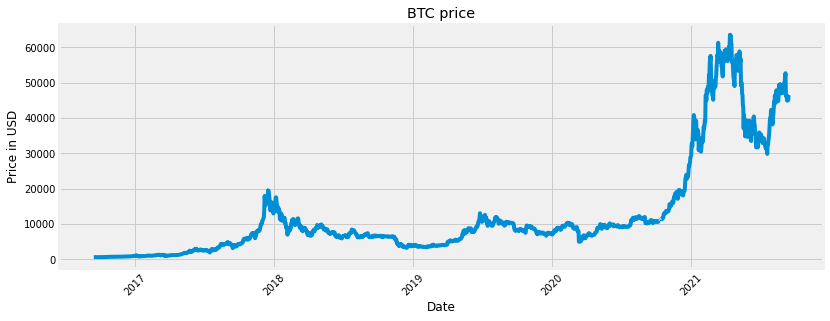

In [ ]:
# Plot the close price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('BTC price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

In [ ]:
# MACD

# Calculate the short term exponential moving average
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
# Calculate the long term exponential moving average
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
# Calculate the MACD
MACD = ShortEMA - LongEMA
# Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

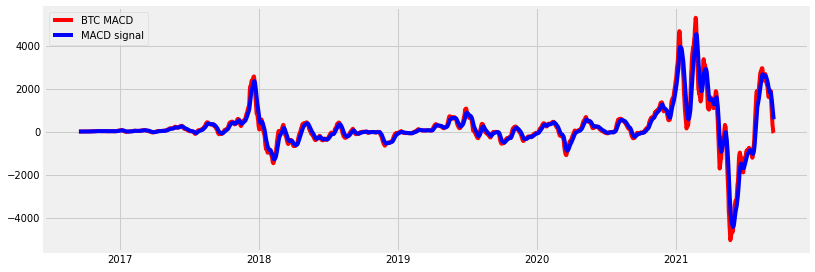

In [ ]:
# Plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label='BTC MACD', color='red')
plt.plot(df.index, signal, label='MACD signal', color='blue')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Create new columns for the data
df['MACD'] = MACD
df['signal'] = signal
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,signal
2016-09-14,2016-09-14,608.841003,611.952026,608.409973,610.684021,610.684021,4.787770e+07,0.000000,0.000000
2016-09-15,2016-09-15,610.588013,611.085999,607.155029,607.155029,607.155029,5.946460e+07,-0.281515,-0.056303
2016-09-16,2016-09-16,607.245972,609.260986,606.734985,606.973022,606.973022,6.496340e+07,-0.513386,-0.147720
2016-09-17,2016-09-17,607.218018,607.859985,605.192017,605.984009,605.984009,3.714030e+07,-0.768097,-0.271795
2016-09-18,2016-09-18,606.283020,610.158020,605.856018,609.874023,609.874023,4.867940e+07,-0.648588,-0.347154
...,...,...,...,...,...,...,...,...,...
2021-09-10,2021-09-10,46396.664063,47031.742188,44344.484375,44883.910156,44883.910156,3.915467e+10,547.921660,1305.845151
2021-09-11,2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,45201.457031,3.449984e+10,296.055459,1103.887212
2021-09-12,2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,46063.269531,2.788198e+10,164.099113,915.929593
2021-09-13,2021-09-13,46057.214844,46598.679688,43591.320313,44963.074219,44963.074219,4.096994e+10,-28.920432,726.959588


In [ ]:
# Create a function to signal when to buy and when to sell
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['signal'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['signal'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
    
    return (Buy, Sell)

In [ ]:
a = buy_sell(df)
df['Buy_signal_price'] = a[0]
df['Sell_signal_price'] = a[1]

ValueError: ignored

In [ ]:
# Create a function to signal when buy/sell signals arise
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['MACD'][i] > data['signal'][i]:
      if flag != 1:
        sigPriceBuy.append(data['Close'][i])
        sigPriceSell.append(np.NaN)
        flag = 1
      else:
        sigPriceBuy.append(np.NaN)
        sigPriceSell.append(np.NaN)
    elif data['MACD'][i] < data['signal'][i]:
      if flag != 0:
        sigPriceBuy.append(np.NaN)
        sigPriceSell.append(data['Close'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.NaN)
        sigPriceSell.append(np.NaN)
    else:
      sigPriceBuy.append(np.NaN)
      sigPriceSell.append(np.NaN)

  return(sigPriceBuy, sigPriceSell)

In [ ]:
a = buy_sell(df)
df['Buy_signal_price'] = a[0]
df['Sell_signal_price'] = a[1]

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,signal,Buy_signal_price,Sell_signal_price
2016-09-14,2016-09-14,608.841003,611.952026,608.409973,610.684021,610.684021,4.787770e+07,0.000000,0.000000,NaN,NaN
2016-09-15,2016-09-15,610.588013,611.085999,607.155029,607.155029,607.155029,5.946460e+07,-0.281515,-0.056303,NaN,607.155029
2016-09-16,2016-09-16,607.245972,609.260986,606.734985,606.973022,606.973022,6.496340e+07,-0.513386,-0.147720,NaN,NaN
2016-09-17,2016-09-17,607.218018,607.859985,605.192017,605.984009,605.984009,3.714030e+07,-0.768097,-0.271795,NaN,NaN
2016-09-18,2016-09-18,606.283020,610.158020,605.856018,609.874023,609.874023,4.867940e+07,-0.648588,-0.347154,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-10,2021-09-10,46396.664063,47031.742188,44344.484375,44883.910156,44883.910156,3.915467e+10,547.921660,1305.845151,NaN,NaN
2021-09-11,2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,45201.457031,3.449984e+10,296.055459,1103.887212,NaN,NaN
2021-09-12,2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,46063.269531,2.788198e+10,164.099113,915.929593,NaN,NaN
2021-09-13,2021-09-13,46057.214844,46598.679688,43591.320313,44963.074219,44963.074219,4.096994e+10,-28.920432,726.959588,NaN,NaN


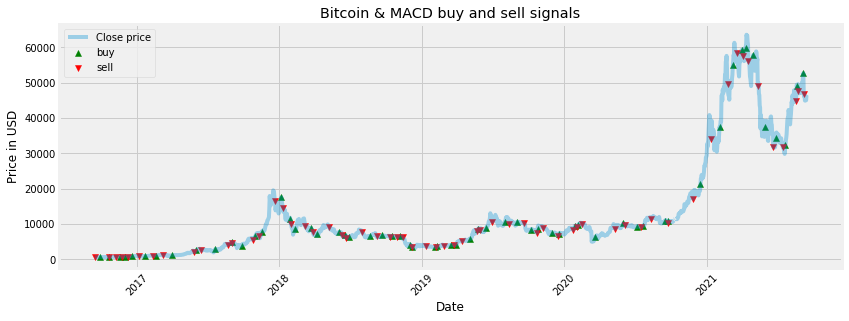

In [ ]:
plt.figure(figsize=(12.5, 4.5))
plt.scatter(df.index, df['Buy_signal_price'], color='green', label='buy', marker='^')
plt.scatter(df.index, df['Sell_signal_price'], color='red', label='sell', marker='v')
plt.plot(df.index, df['Close'], label='Close price', alpha=0.35)
plt.title('Bitcoin & MACD buy and sell signals')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(loc='upper left')
plt.show()